In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\ligio\OneDrive\Desktop\Documents\online_course_engagement_data.csv")

In [3]:
df = pd.DataFrame(data)
df.head(10)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
5,8650,Health,79.466129,12,7,70.233329,76.484023,0,1
6,4321,Health,78.908724,10,2,86.836533,22.588896,1,0
7,4589,Business,12.068237,16,3,61.553646,27.410991,1,0
8,4215,Business,81.935709,8,4,90.264564,33.308437,0,1
9,8089,Programming,83.394026,15,10,63.956353,33.261300,1,0


# now let see how many type of category of course have

In [5]:
df['CourseCategory'].unique()

array(['Health', 'Arts', 'Science', 'Programming', 'Business'],
      dtype=object)

In [6]:
df['CourseCategory'].value_counts()

CourseCategory
Business       1837
Health         1821
Science        1814
Programming    1810
Arts           1718
Name: count, dtype: int64

# let's check whether we have null value

In [7]:
df.isnull().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [8]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


# let find some correlation

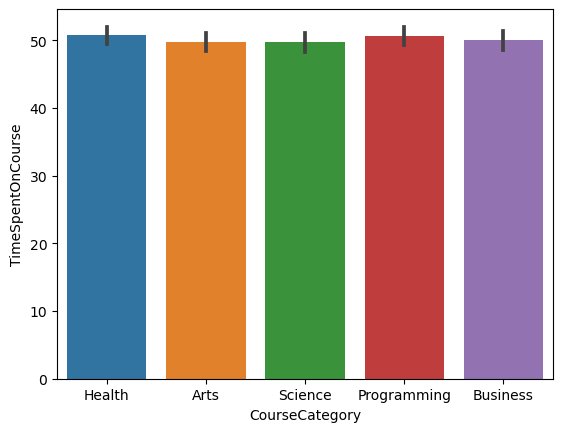

In [11]:
sns.barplot(data = df,x='CourseCategory',y='TimeSpentOnCourse')
plt.show()

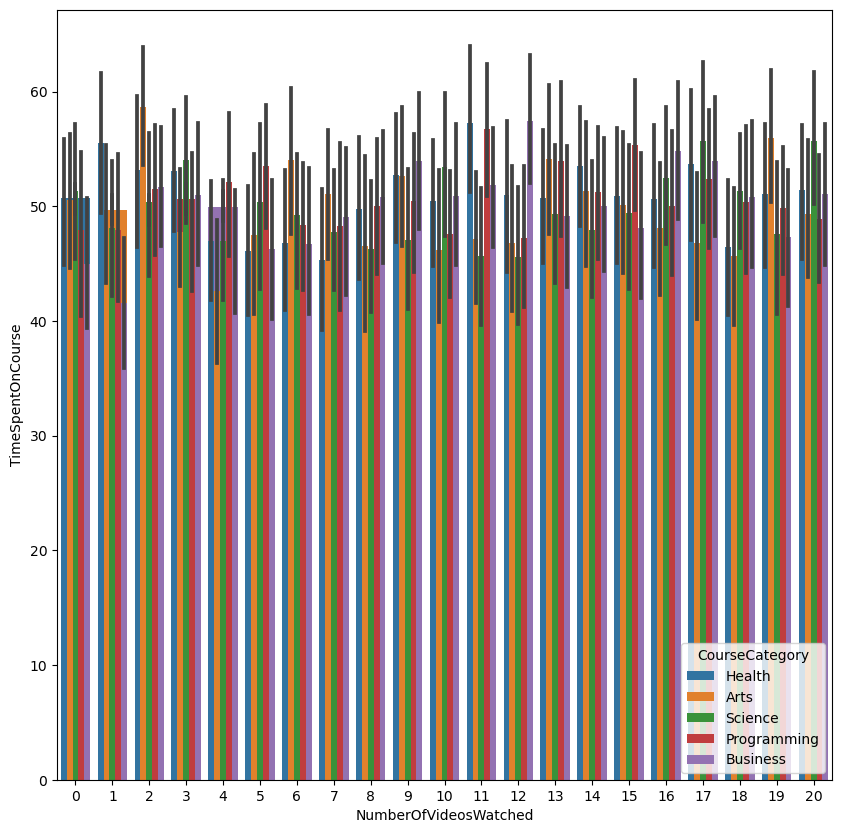

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(data = df,x='CourseCategory',y='TimeSpentOnCourse')
sns.barplot(data = df,x='NumberOfVideosWatched',y='TimeSpentOnCourse',hue='CourseCategory')
plt.show()

C:\Users\ligio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ligio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ligio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ligio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

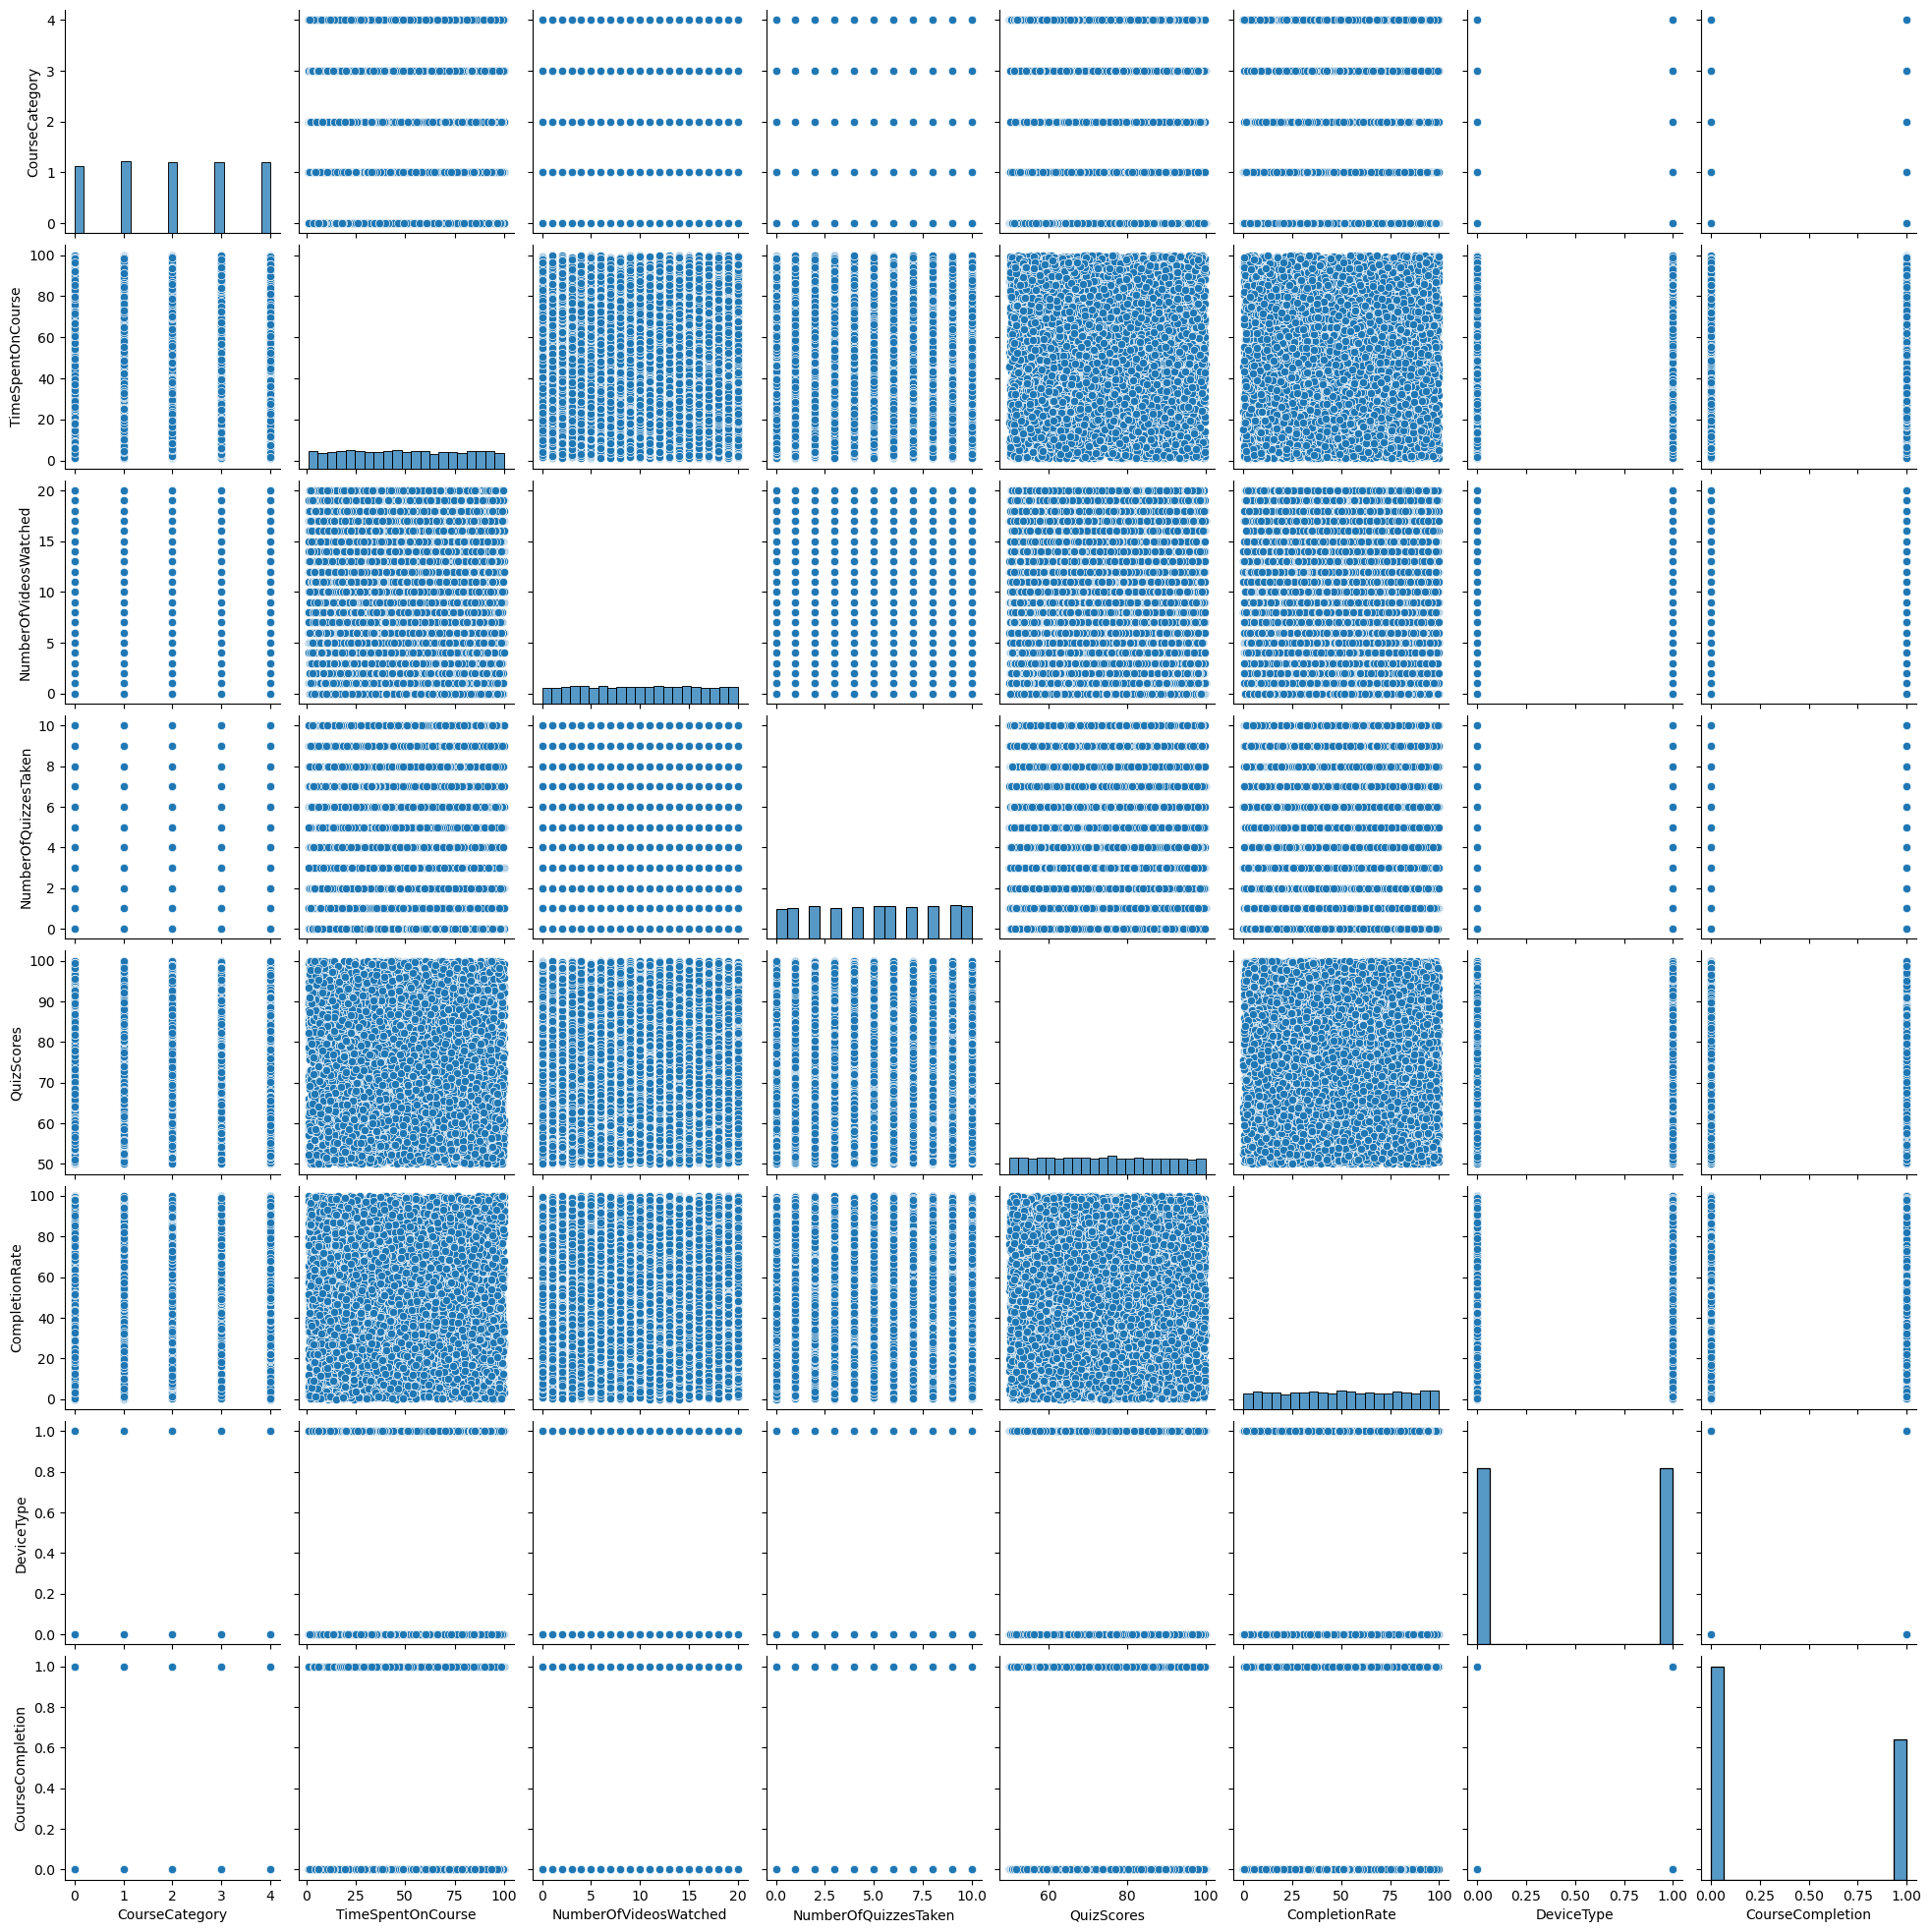

In [47]:
sns.pairplot(df)
plt.show()

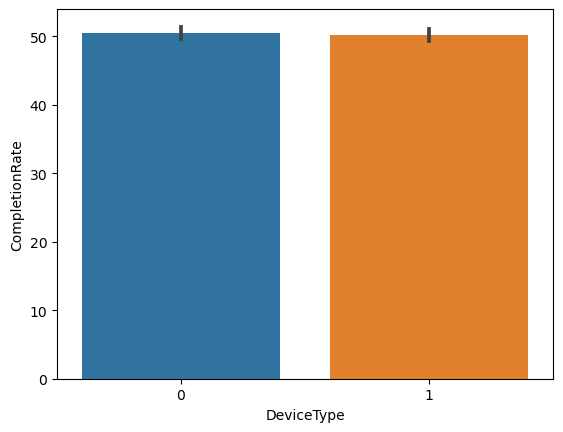

In [23]:
sns.barplot(data=df,x='DeviceType',y='CompletionRate')
plt.show()

In [24]:

from sklearn.preprocessing import LabelEncoder

In [26]:
la = LabelEncoder()
df['CourseCategory']=la.fit_transform(df['CourseCategory'])

In [ ]:
df.drop('UserID',axis=1,inplace=True)

In [38]:
x = df.iloc[:,:-1]
y = df['CourseCompletion']

In [35]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
lr.score(x_test,y_test)*100 , lr.score(x_train,y_train)*100

(78.83333333333333, 80.18055555555556)

In [44]:
df.head(5)

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,2,29.979719,17,3,50.365656,20.860773,1,0
1,0,27.802640,1,5,62.615970,65.632415,1,0
2,0,86.820485,14,2,78.458962,63.812007,1,1
3,4,35.038427,17,10,59.198853,95.433162,0,1
4,3,92.490647,16,0,98.428285,18.102478,0,0


In [46]:
lr.predict([[0,86.820485,14,2,78.458962,63.812007,1]])

C:\Users\ligio\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# so our model predict correct

C:\Users\ligio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ligio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


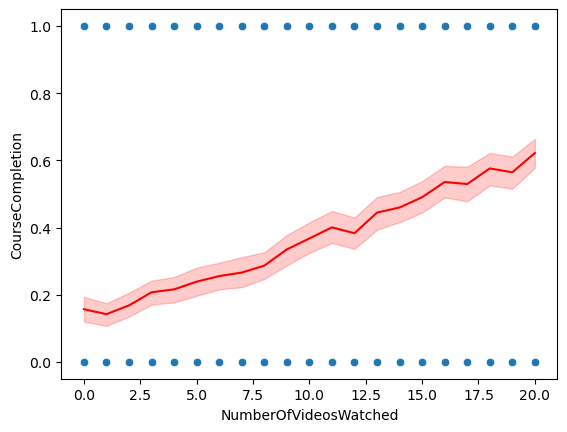

In [58]:

sns.scatterplot(data=df,x='NumberOfVideosWatched',y='CourseCompletion')
sns.lineplot(data=df,x='NumberOfVideosWatched',y=lr.predict(x),c='red')
plt.show()

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
cf = confusion_matrix(y_test,lr.predict(x_test))
cf

array([[909, 159],
       [222, 510]], dtype=int64)

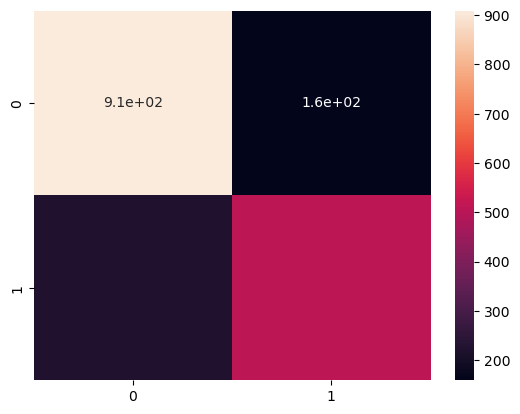

In [64]:
sns.heatmap(cf,annot=True)
plt.show()

# let's try another model

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dr = DecisionTreeClassifier()
dr.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
dr.score(x_test,y_test)*100,dr.score(x_train,y_train)*100

(91.83333333333333, 100.0)

In [68]:
#3	92.490647	16	0	98.428285	18.102478	0	0

In [69]:
dr.predict([[3,92.490647,16,0,98.428285,18.102478,0]])

C:\Users\ligio\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# as per the score it is also giving correct answer

In [70]:
cf1 = confusion_matrix(y_test,dr.predict(x_test))
cf1

array([[1001,   67],
       [  80,  652]], dtype=int64)

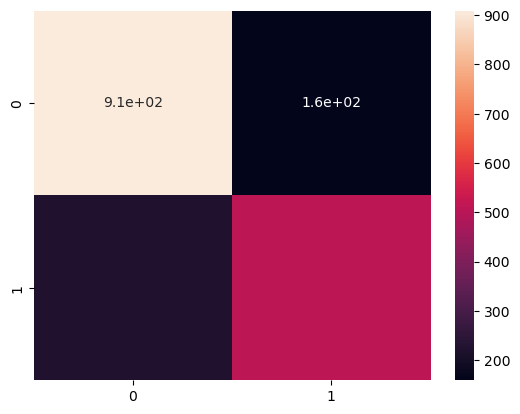

In [71]:
sns.heatmap(cf,annot=True)
plt.show()

# So The Conclusion is We should  stick to Decision Tree because its performing better and also its CONFUSION MATRIX giving less False Negative & False Positive value